## Compare SSE and perceptron classifier

In [998]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

np.random.seed(42)

### Section1: Solve Regression Problem with linear regression cost function and see the results

#### Part1: Generating synthetic data:

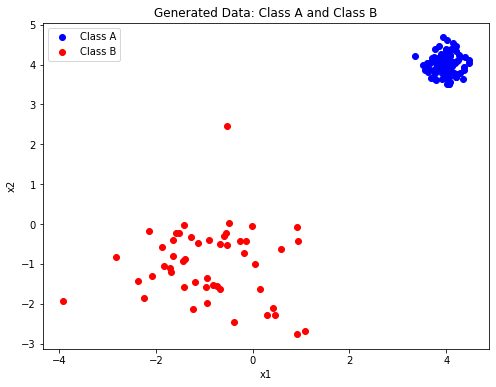

In [999]:
#in summary, this code generates a 2D array of 100 random points
#in 2D space, where each point is normally distributed around the
# mean (4, 4) with a standard deviation of 0.25.
class_A = np.random.normal(loc=(4,4), scale=0.25, size=(100,2))
#This code creates a 1D array of ones with the same number of
#elements as the number of rows in the class_A array.
label_A = np.ones(class_A.shape[0])  # Class A as +1 labels

class_B = np.random.normal(loc=(-1, -1), scale=0.9, size=(50,2))
#label_B = np.zeros(class_B.shape[0])  #Class be should be -1 not 0
label_B = -1 * np.ones(class_B.shape[0])  # Class B as -1


plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

#### Part2: using SSE cost function from linear regression for an linear classification problem:

##### My Own Code:

In [1001]:
X = np.vstack((class_A, class_B))
y = np.hstack((label_A, label_B))
print(X.shape)
print(y.shape)

def regression_closed_form(X, y):
    #Adding Bias:
    X_with_bias = np.c_[np.ones((len(X), 1)), X]
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_with_bias.transpose(), X_with_bias)), np.dot(y.T, X_with_bias ) ) 
    return w

def print_parameter_vectors(w):
    for i in range(len(w)):
        print(f"w{i} = {w[i]}")

def hypotheses_vector(w, X):
    h = w[0] + w[1] * X[: , 0] + w[2] * X[: , 1]
    return h

#Get parameter vector w
w = regression_closed_form(X, y)
print_parameter_vectors(w)

h = hypotheses_vector(w, X)
print(h.shape)


(150, 2)
(150,)
w0 = -0.5479092812348244
w1 = 0.2005583245409507
w2 = 0.18196077453605908
(150,)


##### Using SkLearn:

In [1002]:
model = LinearRegression()
model.fit(X, y)

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")


Model weights: w1 = 0.20, w2 = 0.18, bias = -0.55


##### Plot the fitted line:

###### My Own Code:

(100,)


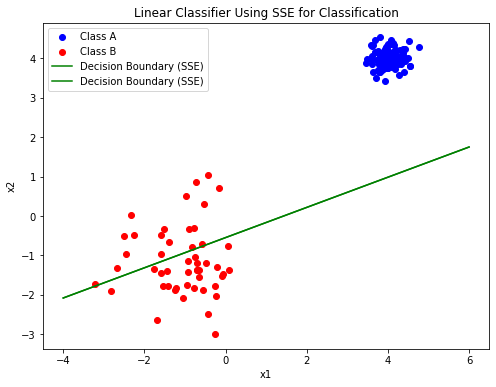

In [1003]:
x_vals = np.linspace(-4, 6, 100)
x_vals_2d = np.column_stack((x_vals, x_vals))

print(x_vals.shape)
decision_boundary = hypotheses_vector(w, x_vals_2d)

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals_2d, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

###### Masters Code:

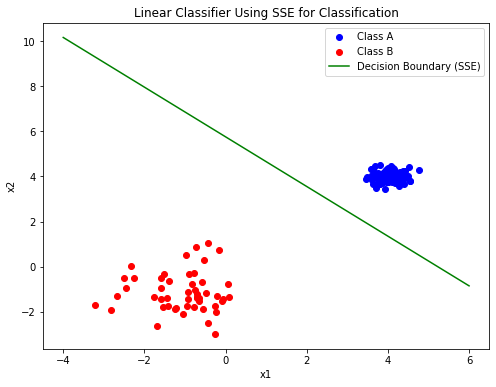

In [1004]:
# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


### Section2, Implementing a Perceptron Neural Network:

#### Part1: Implement a Perceptron on Generating synthetic data from section1:

In [1005]:
from random import sample
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs      = n_epochs
        self.weights       = None
        self.bias          = None
        self.errors_       = []
    
    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape

        #Starting weights and bias with zero:
        #self.weights = np.zeros(n_features)
        self.weights   = np.random.rand(n_features) 
        self.bias      = 0.00

        for epoch in range(self.n_epochs):
            errors = 0 
            for i in range(n_samples):
                linear_output = np.dot(self.weights, X[i]) + self.bias # w^T x + b
                y_predicted   = self._unit_step(linear_output)
                #Misclassified:
                if y_predicted != y[i]:
                    update        = self.learning_rate * y[i]
                    self.weights += update * X[i]
                    self.bias    += update
                    errors       += 1

            self.errors_.append(errors)

            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break
    
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)
         

In [1006]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X, y)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")


Converged after 13 epochs
Final Weights: [0.78184109 0.46276214]
Final Bias: -0.21000000000000005


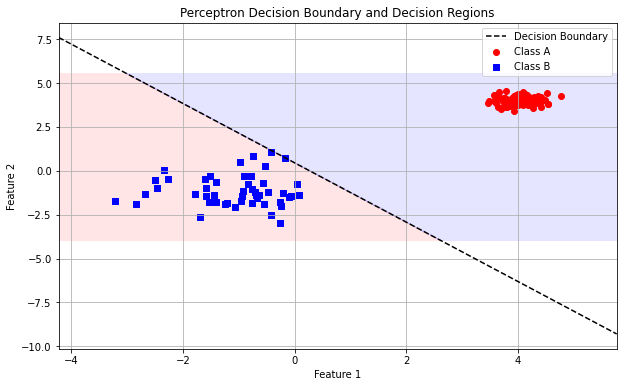

In [1007]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


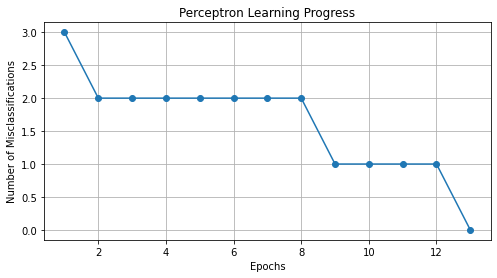

In [1008]:
plt.figure(figsize=(8, 4))
                                                                  #perceptron.errors_[::20]
plt.plot(range(1,len(perceptron.errors_)+1,1), perceptron.errors_[::1], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()


#### Part2: Implement a Perceptron on Linearly Separable Data:

In [1009]:
def generate_ab_class(n_points=1000):
    dataset_A = []
    dataset_B = []
    while len(dataset_A) < n_points or len(dataset_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(dataset_A) < n_points:
            dataset_A.append([x, y])
        elif y < x and len(dataset_B) < n_points:
            dataset_B.append([x, y])
    return np.array(dataset_A), np.array(dataset_B)

class_A_LS, class_B_LS = generate_ab_class()

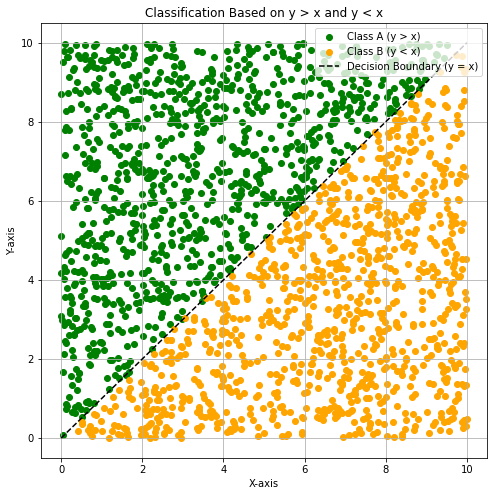

In [1010]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()


In [1011]:
#X_ab: combined feature data from class A and class B

X_AB_linear_sep = np.vstack((class_A_LS, class_B_LS))
y_AB_linear_sep = np.hstack( ( np.ones(class_A_LS.shape[0]), -np.ones(class_B_LS.shape[0]) ) )

shuffle_idx = np.random.permutation(len(X_AB_linear_sep))
X_AB_linear_sep, y_AB_linear_sep = X_AB_linear_sep[shuffle_idx], y_AB_linear_sep[shuffle_idx]

print("Combined Data Sample Points:\n", X_AB_linear_sep[:5])
print("Combined Labels:\n", y_AB_linear_sep[:5])


Combined Data Sample Points:
 [[1.60759896 8.17967024]
 [8.15833125 2.24440572]
 [8.25932309 6.31458793]
 [8.36117703 8.21388363]
 [1.10989469 4.47055544]]
Combined Labels:
 [ 1. -1. -1. -1.  1.]


In [1012]:
ls_perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
ls_perceptron.fit(X_AB_linear_sep, y_AB_linear_sep)

print(f"Final Weights: {ls_perceptron.weights}")
print(f"Final Bias: {ls_perceptron.bias}")


Converged after 409 epochs
Final Weights: [-3.51078527  3.50638016]
Final Bias: 0.019999999999999997


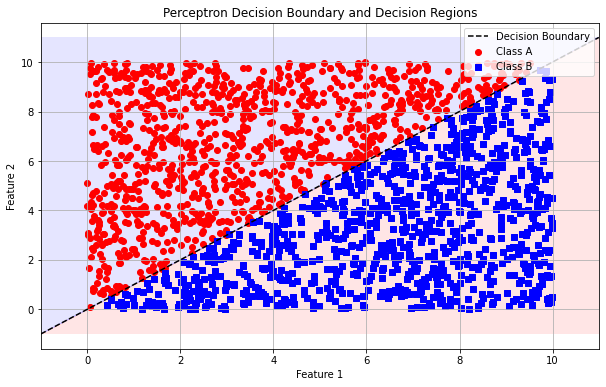

In [1013]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_AB_linear_sep[:, 0].min() - 1, X_AB_linear_sep[:, 0].max() + 1
y_min, y_max = X_AB_linear_sep[:, 1].min() - 1, X_AB_linear_sep[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = ls_perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if ls_perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(ls_perceptron.weights[0] * x_vals + ls_perceptron.bias) / ls_perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -ls_perceptron.bias / ls_perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A_LS[:, 0], class_A_LS[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B_LS[:, 0], class_B_LS[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()
     


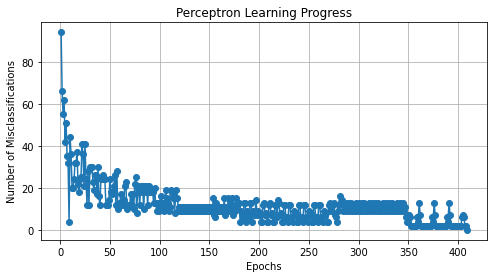

In [1014]:
plt.figure(figsize=(8, 4))
                                                                  #perceptron.errors_[::20]
plt.plot(range(1,len(ls_perceptron.errors_)+1,1), ls_perceptron.errors_[::1], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

# Q:

## why this perceptron code doesnt converge to zero with this code:
The perceptron algorithm is a simple linear classifier that can converge to a solution under certain conditions. However, there are several reasons why the perceptron code you provided might not converge for some datasets:

1. **Linearly Inseparable Data**: The most common reason for non-convergence is that the data is not linearly separable. The perceptron algorithm can only find a solution if the classes can be separated by a linear boundary. If the data points of different classes cannot be separated by a straight line (or hyperplane in higher dimensions), the perceptron will not converge.

2. **Learning Rate**: The learning rate (`learning_rate`) can affect convergence. If the learning rate is too high, the updates to the weights may overshoot the optimal solution, causing oscillations and preventing convergence. Conversely, if it is too low, convergence may take an excessively long time.

3. **Number of Epochs**: The maximum number of epochs (`n_epochs`) is a limiting factor. If the data is complex or if the learning rate is not optimal, the perceptron may require more epochs to converge than specified. If the maximum number of epochs is reached without convergence, the training will stop.

4. **Data Scaling**: If the features in `X` are not scaled properly, it can lead to poor convergence behavior. Features with very different scales can cause the perceptron to struggle to find a suitable decision boundary.

5. **Initialization of Weights**: The weights are initialized to zero in your implementation. While this is common, it can sometimes lead to issues, especially if the data is not centered around zero. Random initialization of weights can sometimes help in certain scenarios.

6. **Class Labels**: The perceptron expects the target values (`y`) to be either +1 or -1. If the labels are not in this format (e.g., 0 and 1), the perceptron will not function correctly. Ensure that the labels are correctly formatted.

7. **Data Quality**: Noisy data or outliers can also affect the convergence of the perceptron. If there are many misclassified points due to noise, the perceptron may struggle to find a stable solution.

### Recommendations
- **Check for Linear Separability**: Visualize your data to see if it is linearly separable.
- **Adjust Learning Rate**: Experiment with different learning rates to see if it affects convergence.
- **Increase Epochs**: If you suspect that the model needs more time to converge, increase the number of epochs.
- **Scale Your Data**: Consider normalizing or standardizing your features.
- **Random Initialization**: Try initializing weights randomly instead of starting with zeros.
- **Verify Labels**: Ensure that your target labels are in the correct format (+1 and -1).

By addressing these factors, you may improve the convergence behavior of your perceptron implementation.